In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lab1lakedatascientific-computing/lakeTrout_otolithGrowth_LakeClarkNP_vonBiela_1979_2012.csv
/kaggle/input/lab1lakedatascientific-computing/lakeTrout_otolithGrowth_LakeClarkNP_vonBiela_1979_2012_metadata.xml
/kaggle/input/lab1lakedatascientific-computing/lakeTrout_otolithGrowth_LakeClarkNP_vonBiela_1979_2012_metadata.html


Read the CSV file as link

In [24]:
lake = pd.read_csv("/kaggle/input/lab1lakedatascientific-computing/lakeTrout_otolithGrowth_LakeClarkNP_vonBiela_1979_2012.csv")

# 1.1 Create a Data Dictionary

This data set documents the width of annual otolith growth increments from Lake Trout collected in lakes within Lake Clark National Park and Preserve, Alaska. The analysis of this data was published in 

Location: Lake Clark, Alaska

Dates of Data Collection: 1979-2012

Purpose:The data were obtained to develop an otolith growth chronology for Lake Trout as a proxy for lake production

Columns:

Comma Separated Value (CSV) table containing lake trout id number assignments (FishID, object), replicate identification (ReplicateID, object), the axis used to measure otolith rings (Axis, object), from what lake the fish was caught (Lake, object), the year of capture for the growth increment of the otolith (Year, int64, years), the age of the fish at the time of increment formation (Age, int64, years), and the width of the annual increment measured in millimeters(Width, float, mm).

The Attribute Accuracy was reported as spot on

Measurement time series can be incomplete within an individual if the annuli for younger ages were difficult to delineate

171 of 251 total lake trout caught that were not included because they had otolith growth increments that were not clear enough for growth measurements

Find the datatypes of all of the columns

In [25]:
lake.dtypes

FishID          object
ReplicateID     object
Axis            object
Lake            object
Year             int64
Age              int64
Width          float64
dtype: object

# 1.2 Grokking and Transforming Data

Find the shape of the dataframe

In [26]:
lake.shape

(2403, 7)

Rows and columns:
Using the df.shape function, we can see that the dataframe has 2403 rows
and 7 columns

In [27]:
lake.head(6)

,FishID,ReplicateID,Axis,Lake,Year,Age,Width
0,LLC_LT028,LT028A,S,Little Lake Clark,1987,4,0.048
1,LLC_LT028,LT028A,S,Little Lake Clark,1988,5,0.038
2,LLC_LT028,LT028A,S,Little Lake Clark,1989,6,0.046
3,LLC_LT028,LT028A,S,Little Lake Clark,1990,7,0.037
4,LLC_LT028,LT028A,S,Little Lake Clark,1991,8,0.040
5,LLC_LT028,LT028A,S,Little Lake Clark,1992,9,0.039


Rename all of the columns to be lower case

In [28]:
lake = lake.rename(columns=str.lower)
lake.head()

,fishid,replicateid,axis,lake,year,age,width
0,LLC_LT028,LT028A,S,Little Lake Clark,1987,4,0.048
1,LLC_LT028,LT028A,S,Little Lake Clark,1988,5,0.038
2,LLC_LT028,LT028A,S,Little Lake Clark,1989,6,0.046
3,LLC_LT028,LT028A,S,Little Lake Clark,1990,7,0.037
4,LLC_LT028,LT028A,S,Little Lake Clark,1991,8,0.040


A duplicate row is a row that is exactly the same as another row in the dataframe. There were 4 duplicate rows in the dataframe before I dropped them. The shape of the dataframe went from 

In [29]:
lake.reset_index()

,index,fishid,replicateid,axis,lake,year,age,width
0,0,LLC_LT028,LT028A,S,Little Lake Clark,1987,4,0.048
1,1,LLC_LT028,LT028A,S,Little Lake Clark,1988,5,0.038
2,2,LLC_LT028,LT028A,S,Little Lake Clark,1989,6,0.046
3,3,LLC_LT028,LT028A,S,Little Lake Clark,1990,7,0.037
4,4,LLC_LT028,LT028A,S,Little Lake Clark,1991,8,0.040
...,...,...,...,...,...,...,...,...
2398,2398,LT0105,LT105B,L,Telaquana,1997,13,0.062
2399,2399,LT0105,LT105B,L,Telaquana,1998,14,0.045
2400,2400,LT0105,LT105B,L,Telaquana,1999,15,0.037
2401,2401,LT0105,LT105B,L,Telaquana,2000,16,0.035


Find how many duplicates are in the data set

In [30]:
#duplicates
lake.reset_index()
start = lake.shape[0]

lake.drop_duplicates(inplace=True)
end = lake.shape[0]
print(f"There are {start-end} duplicates in the dataframe")


There are 4 duplicates in the dataframe


There are 80 different types of fish in this data set (see below)

In [31]:
#how many different types of fish are being studied
lake["fishid"].nunique()

80

# 1.3 Descriptive Statistics

Basic statistics of data

In [32]:
lake.describe()

,year,age,width
count,2399.000000,2399.000000,2399.000000
mean,2001.581492,10.235932,0.042745
std,5.834735,4.619846,0.020507
min,1979.000000,1.000000,0.013000
25%,1998.000000,7.000000,0.028000
50%,2002.000000,10.000000,0.038000
75%,2006.000000,13.000000,0.052000
max,2012.000000,29.000000,0.186000


In [33]:
#max of age other than using describe
lake["age"].max()

29

In [34]:
#min of age other than using describe
lake["age"].min()

1

In [35]:
#For the year column, run .value_counts().
lake["year"].value_counts()

year
2001    173
2002    165
2000    160
1999    142
2006    138
2007    138
2008    137
2005    136
2003    135
2004    131
1998    126
2009    126
1997    100
1996     89
2010     83
1995     68
2011     60
1994     57
1993     48
1992     39
1991     32
1990     26
1989     19
1988     15
2012     13
1987     12
1986      8
1985      4
1984      4
1983      4
1982      4
1981      3
1980      2
1979      2
Name: count, dtype: int64

In [36]:
#For the lake column, run .value_counts()
lake["lake"].value_counts()

lake
Telaquana            431
Kontrashibuna        409
Portage              373
Fishtrap             358
Lake Clark           329
Lachbuna             197
Little Lake Clark    161
Kijik                141
Name: count, dtype: int64

# 2.1

Consolidate the data into two columns

In [37]:
picky = lake[["lake", "fishid"]]
picky.head()

,lake,fishid
0,Little Lake Clark,LLC_LT028
1,Little Lake Clark,LLC_LT028
2,Little Lake Clark,LLC_LT028
3,Little Lake Clark,LLC_LT028
4,Little Lake Clark,LLC_LT028


# 2.2

Drop the duplicates rows for the fish

In [38]:
#Drop duplicates
picky.drop_duplicates(inplace=True)
picky.shape

/tmp/ipykernel_36/2573952411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(80, 2)

# 2.3

aggregate the data with groupby and count how many fish are in each lake

In [39]:
aggregate = picky.groupby('lake', as_index=False).count()
aggregate.head()

,lake,fishid
0,Fishtrap,9
1,Kijik,7
2,Kontrashibuna,15
3,Lachbuna,10
4,Lake Clark,9


# 2.4

Change the column name of fish_id into fish_count

In [40]:
aggregate.rename(columns={"fishid":"fish_count"})

,lake,fish_count
0,Fishtrap,9
1,Kijik,7
2,Kontrashibuna,15
3,Lachbuna,10
4,Lake Clark,9
5,Little Lake Clark,6
6,Portage,9
7,Telaquana,15


# 2.5

Convert Dataframe into CSV file

In [46]:
#used https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file to assist 
#downloading the csv because I was lost
aggregate.to_csv("JackHamiltonLab1.csv", sep='\t', encoding='utf-8', index=False, header=True)

# Step 3

Python version of data analysis

In [42]:
#For the lake column, run .value_counts(), use dict
water= {}
for i in lake["lake"]:
    if i in water:
        water[i] +=1
    else:
        water[i] = 1

#for key,value in water.items():
    #print(f"{key:0}{value:6}")
print(water)

Little Lake Clark   161
Kijik   141
Portage   373
Telaquana   431
Kontrashibuna   409
Lake Clark   329
Fishtrap   358
Lachbuna   197
{'Little Lake Clark': 161, 'Kijik': 141, 'Portage': 373, 'Telaquana': 431, 'Kontrashibuna': 409, 'Lake Clark': 329, 'Fishtrap': 358, 'Lachbuna': 197}


# Ignore everything below here. These are in class notes on plotnine

In [43]:
#in class notes start here

from plotnine import *

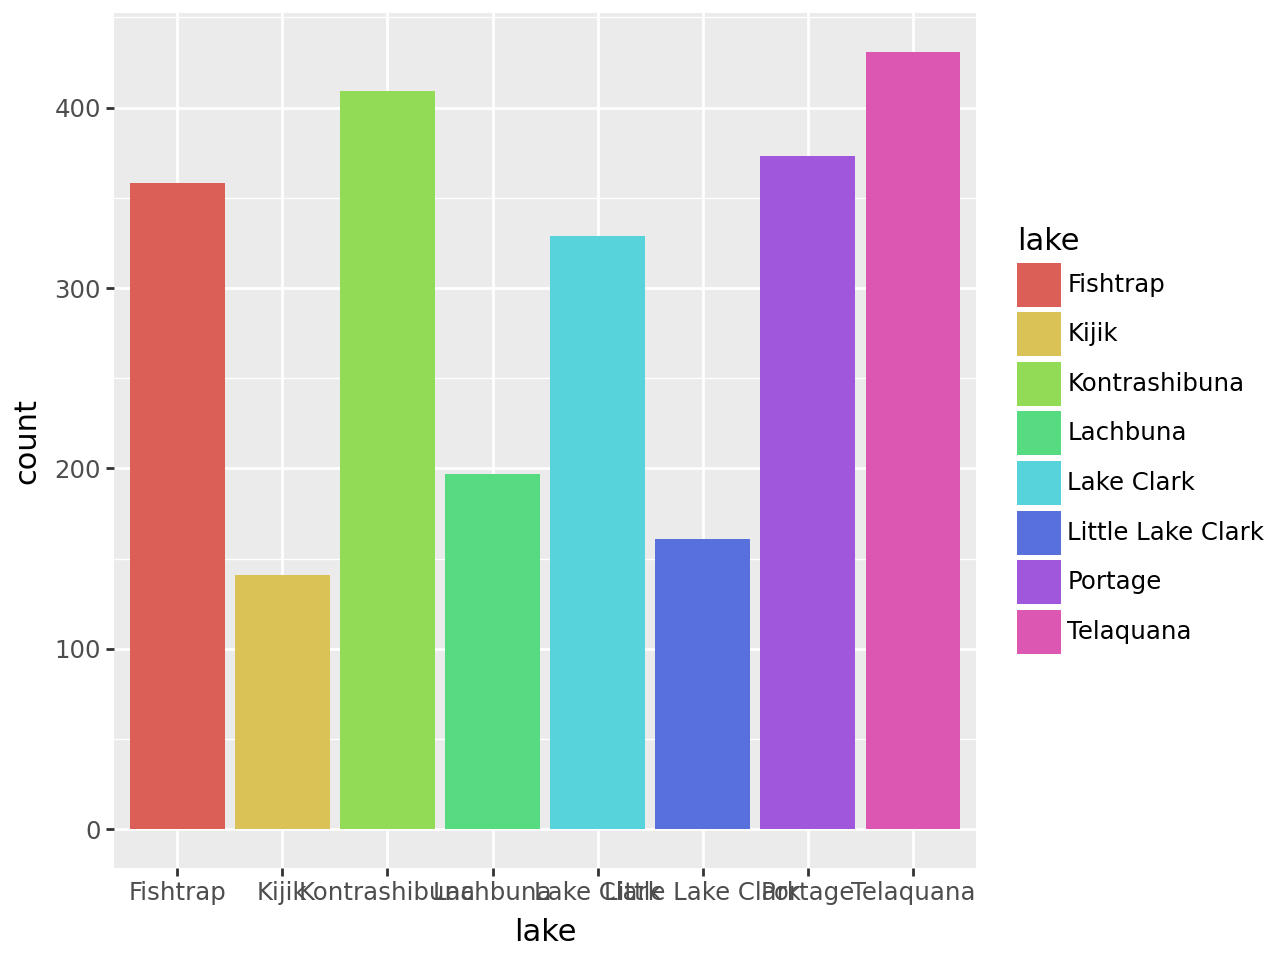

In [44]:
#displays lake data with plotnine as a bar graph
#fill displays the bar graph as different colors with a key. Adding lake displays each lake as different colors

(
    ggplot(lake, aes("lake", fill="lake")) + 
    geom_bar()
)

#notes because my data does not work for this
(
    ggplot(df, aes("species", "island", fill="island")) + 
    geom_bar(position= )
)

#notes because my data does not work for this
(
    ggplot(df, aes("flipper_length_mm", "island",y="after_stat("count") fill="island")) + 
    geom_histogram(bins=30, color="white", fill= "blue")
)

#geom_density() prints a density chart of the data

facet_wrap("species") Creates side by side distributions of all of the species in the column

Quantitative vs Quantitative (notes because data is not compatible with study)
in aes, the first parameter is always what is displayed in the x axis
geom_smooth(method="lm") = line of best fit or regression line/ lm means linear model

(
    ggplot(df, aes("species", "island")) + 
    geom_point(position= )
    geom_smooth(method="lm")
)